# Imports

In [1]:
import math

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats as st

In [6]:
import statsmodels.api as sm
import statsmodels.stats.power as sm_power

---

In [7]:
from IPython.display import display, HTML

In [8]:
def pprint(txt='', ltxt=None, alert='success'): 
    display(HTML(f"""
        <div class='alert alert-block alert-{alert}'>
            {txt}
            {f'''/b/begin{{align*}}{ltxt}/b/end{{align*}}''' if ltxt else ''}
        </div>
    """.replace("/b/", "\\")))

# Assignment 1

## 1.

<div class="alert alert-block alert-warning">
\begin{equation*}
    \begin{aligned}[c]
        n_m &= 814\\
        \bar{x}_m &= 177.7\, cm\\
        s_m^2 &= 49.0\, cm^2
    \end{aligned}
    \qquad\qquad\qquad\qquad
    \begin{aligned}[c]
        n_f &= 854\\
        \bar{x}_f &= 165.1\, cm\\
        s_f^2 &= 38.4\, cm^2
    \end{aligned}
\end{equation*}
</div>

`b.`

<div class="alert alert-block alert-info">
\begin{align}
    Cohen's\ d &= \frac{\bar{x}_1 - \bar{x}_2}{s}
    \backepsilon s = \sqrt{\frac{(n_1 - 1).s_1^2 + (n_2 - 1).s_2^2}{n_1 + n_2 - 2}}
\end{align}
</div>

`a.`

<div class="alert alert-block alert-success">
\begin{align}
    d &= \frac{\bar{x}_m - \bar{x}_f}{s} = \frac{177.7 - 165.1}{s} = \frac{12.6}{s}\\
    s &= \sqrt{\frac{(n_m - 1).s_m^2 + (n_f - 1).s_f^2}{n_m + n_f - 2}}\\
      &= \sqrt{\frac{(814 - 1)*49.0 + (854 - 1)*38.4}{814 + 854 - 2}}\\
      &= 6.601\\\\
    \therefore d &= \frac{12.6}{6.6} = 1.91
\end{align}
</div>

`c.`

<div class="alert alert-block alert-success">
The effect size is large.
</div>

## 2.

<div class="alert alert-block alert-info">
For equal sample size and sample variance, the independent two-sample t-test t-statistic is related to the effct size by the following relationship.
\begin{align}
    t = d.\sqrt{\frac{n}{2}}
\end{align}
</div>

<div class="alert alert-block alert-success">
So, the t-value for the given conditions is $0.2*\sqrt{\frac{72}{2}} = 1.2 > \alpha\ (0.05)$. Therefore, the effect is <b>not significant</b>.
</div>

## 3.

<div class="alert alert-block alert-warning">
\begin{equation*}
    \begin{aligned}[c]
        g_m &= 8.66\\
        s_m &= 3.2\\
    \end{aligned}
    \qquad\qquad\qquad\qquad
    \begin{aligned}[c]
        g_f &= 8.45\\
        s_f &= 2.8\\
    \end{aligned}\\
    r = 0.47
\end{equation*}
</div>

<div class="alert alert-block alert-success">
\begin{align}
    d_{rm} &= \frac{\bar{g}_m - \bar{g}_f}{s_z} = \frac{8.66 - 8.45}{s_z} = \frac{0.21}{s_z}\\
    s_z &= \sqrt{\frac{s_m^2 + s_f^2 - 2.r.s_m.s_f}{2.(1-r)}}\\
        &= \sqrt{\frac{3.2^2 + 2.8^2 - 2*0.47*3.2*2.8}{2*(1-0.47)}}\\
        &= 3.018\\\\
    \therefore d_{rm} &= \frac{0.21}{3.018} = 0.696
\end{align}
</div>

## 4

<div class="alert alert-block alert-info">
The variance explained can be captured partial eta-squared ($\eta^2$) measure, which is related to the f-statistic ($f$) in ANOVA as,
    $$f^2 = \frac{\eta^2}{1-\eta^2}$$
<div>

<div class="alert alert-block alert-warning">
\begin{align*}
    \eta^2 &= 0.1\\
    1-\beta &= 0.9\\
    \alpha &= 0.05\\
\end{align*}
</div>

<div class="alert alert-block alert-success">
\begin{align*}
    \therefore f &= \sqrt{\frac{0.1}{1-0.1}} = 0.333
\end{align*}
</div>

`a.`

In [9]:
nobs = math.ceil(sm_power.FTestAnovaPower().solve_power(effect_size=0.333, alpha=0.05, power=0.9, k_groups=3))
pprint(ltxt=f"\\text{{Using power analyis, number of samples required for effect size }} (f = 0.333) \\Rightarrow {nobs}")

`b.`

In [10]:
powers = np.arange(0.06, 0.99, 0.01)
nobss = np.array([float(sm_power.FTestAnovaPower().solve_power(effect_size=0.333, alpha=0.05, power=power, k_groups=3)) for power in powers])

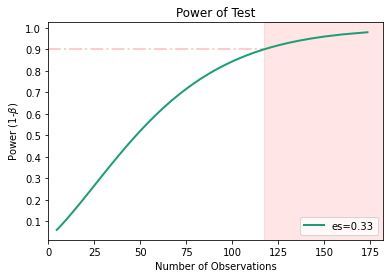

In [11]:
sm_power.FTestAnovaPower().plot_power('nobs', nobs=nobss, effect_size=[0.333], alpha=[0.05], k_groups=3)
plt.xlim([0, None])
# plt.xticks(np.append(plt.xticks()[0], math.ceil(nobss[np.isclose(powers, 0.9)][0])))
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel(r"Power (1-$\beta$)")
plt.axvspan(nobss[np.isclose(powers, 0.9)][0], plt.xticks()[0][-1], color='r', alpha=0.1)
plt.hlines(0.9, 0, nobss[np.isclose(powers, 0.9)][0], color='r', ls='-.', lw=2, alpha=0.2);

`c.`

In [12]:
nobs = math.ceil(sm_power.FTestAnovaPower().solve_power(effect_size=0.1, alpha=0.05, power=0.9, k_groups=3))
pprint(ltxt=f"\\text{{Using power analyis, number of samples required for effect size }} (f = 0.1) \\Rightarrow {nobs}")

## 5.

In [13]:
data = pd.read_csv('data2/1/Table1.csv')

In [14]:
data.head()

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p
0,1,0,-7.877204,91.521064,10.205394,111.895157,3.785805e-01
1,2,1,29.994295,95.425780,-69.758266,94.396975,8.650106e-07
2,3,1,-14.750289,91.456969,59.478600,77.639469,3.032362e-05
3,4,1,15.365896,108.016974,-65.388718,97.181716,1.583762e-04
4,5,0,-6.467899,92.043180,-1.512149,78.736410,7.729575e-01


In [15]:
alpha = 0.05

### `1. No Correction`

In [16]:
c = 'n_c'

In [17]:
data[c] = data['p'] < alpha

> `Which items differ significantly using α=0.05.?`

In [18]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c
0,2,1,29.994295,95.425780,-69.758266,94.396975,8.650106e-07,True
1,3,1,-14.750289,91.456969,59.478600,77.639469,3.032362e-05,True
2,4,1,15.365896,108.016974,-65.388718,97.181716,1.583762e-04,True
3,9,1,-1.607536,106.710088,47.116989,93.501920,1.699042e-02,True
4,12,1,-3.337813,100.688518,55.741800,77.225995,1.383237e-03,True
5,17,1,17.397040,91.816131,-36.685736,89.275218,3.567915e-03,True
6,18,0,10.630157,116.847023,-35.981509,108.310455,4.120774e-02,True
7,22,1,3.724174,104.332472,-61.473413,89.711421,1.146776e-03,True
8,28,1,14.837358,89.832916,70.702745,98.851208,3.887910e-03,True
9,30,1,-11.133983,102.951818,61.504223,121.314186,1.695383e-03,True


> `How many items are false positives? Which items?`

In [19]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c
0,18,0,10.630157,116.847023,-35.981509,108.310455,0.041208,True


> `How many items are false negatives? Which items?`

In [20]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c


### `2. Bonferroni FWE Correction`

In [21]:
c = 'bfwe_c'

In [22]:
data[c] = data['p'] < alpha/data.shape[0]

In [23]:
pprint(ltxt=f"\\alpha = {alpha/data.shape[0]:.5f}")

> `Which items differ significantly using α=0.05.?`

In [24]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c
0,2,1,29.994295,95.425780,-69.758266,94.396975,8.650106e-07,True,True
1,3,1,-14.750289,91.456969,59.478600,77.639469,3.032362e-05,True,True
2,4,1,15.365896,108.016974,-65.388718,97.181716,1.583762e-04,True,True
3,22,1,3.724174,104.332472,-61.473413,89.711421,1.146776e-03,True,True


> `How many items are false positives? Which items?`

In [25]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c


> `How many items are false negatives? Which items?`

In [26]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c
0,9,1,-1.607536,106.710088,47.116989,93.501920,0.016990,True,False
1,12,1,-3.337813,100.688518,55.741800,77.225995,0.001383,True,False
2,17,1,17.397040,91.816131,-36.685736,89.275218,0.003568,True,False
3,28,1,14.837358,89.832916,70.702745,98.851208,0.003888,True,False
4,30,1,-11.133983,102.951818,61.504223,121.314186,0.001695,True,False
5,32,1,4.420160,102.200128,61.186652,97.454919,0.005448,True,False


### `3. Bonferroni-Holm FWE Correction`

In [27]:
c = 'bhfwe_c'

In [28]:
data = data.sort_values('p', ignore_index=True) # Sort table in ascending order of significances
# Bonferroni-Holm iteration without EXIT
data[c] = [h['p'] < alpha/(data.shape[0] - i) for i, h in data.iterrows()]
# Account for the EXIT condition in separate step by carrying over a rejection to the subsequent/following hypotheses
data[c] = [h[c] & (data[c][i-1] if i else True) for i, h in data.iterrows()]

In [29]:
pprint(ltxt=f"\\alpha = {alpha/(data.shape[0] - data.loc[~data[c]].index[0]):.5f}")

> `Which items differ significantly using α=0.05.?`

In [30]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c
0,2,1,29.994295,95.425780,-69.758266,94.396975,8.650106e-07,True,True,True
1,3,1,-14.750289,91.456969,59.478600,77.639469,3.032362e-05,True,True,True
2,4,1,15.365896,108.016974,-65.388718,97.181716,1.583762e-04,True,True,True
3,12,1,-3.337813,100.688518,55.741800,77.225995,1.383237e-03,True,False,True
4,22,1,3.724174,104.332472,-61.473413,89.711421,1.146776e-03,True,True,True


> `How many items are false positives? Which items?`

In [31]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c


> `How many items are false negatives? Which items?`

In [32]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c
0,9,1,-1.607536,106.710088,47.116989,93.501920,0.016990,True,False,False
1,17,1,17.397040,91.816131,-36.685736,89.275218,0.003568,True,False,False
2,28,1,14.837358,89.832916,70.702745,98.851208,0.003888,True,False,False
3,30,1,-11.133983,102.951818,61.504223,121.314186,0.001695,True,False,False
4,32,1,4.420160,102.200128,61.186652,97.454919,0.005448,True,False,False


### `4. Bonferroni-Hochberg FDR Correction`

In [33]:
c = 'bhfdr_c'

In [34]:
# data = data.sort_values('p', ignore_index=True) # Sort table in ascending order of significances
# Bonferroni-Hochberg iteration
data[c] = [h['p'] < alpha*(i+1)/data.shape[0] for i, h in data.iterrows()]

In [35]:
pprint(ltxt=f"\\alpha = {alpha*(data.loc[data[c]].index[-1]+2)/data.shape[0]:.5f}")

> `Which items differ significantly using α=0.05.?`

In [36]:
data.loc[data[c]].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c,bhfdr_c
0,2,1,29.994295,95.425780,-69.758266,94.396975,8.650106e-07,True,True,True,True
1,3,1,-14.750289,91.456969,59.478600,77.639469,3.032362e-05,True,True,True,True
2,4,1,15.365896,108.016974,-65.388718,97.181716,1.583762e-04,True,True,True,True
3,12,1,-3.337813,100.688518,55.741800,77.225995,1.383237e-03,True,False,True,True
4,17,1,17.397040,91.816131,-36.685736,89.275218,3.567915e-03,True,False,False,True
5,22,1,3.724174,104.332472,-61.473413,89.711421,1.146776e-03,True,True,True,True
6,28,1,14.837358,89.832916,70.702745,98.851208,3.887910e-03,True,False,False,True
7,30,1,-11.133983,102.951818,61.504223,121.314186,1.695383e-03,True,False,False,True
8,32,1,4.420160,102.200128,61.186652,97.454919,5.448136e-03,True,False,False,True


> `How many items are false positives? Which items?`

In [37]:
data.loc[data[c] & ~data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c,bhfdr_c


> `How many items are false negatives? Which items?`

In [38]:
data.loc[~data[c] & data['PopulationEffect']].sort_values('ItemNr', ignore_index=True)

,ItemNr,PopulationEffect,MeanGroup1,SDGroup1,MeanGroup2,SDGroup2,p,n_c,bfwe_c,bhfwe_c,bhfdr_c
0,9,1,-1.607536,106.710088,47.116989,93.50192,0.01699,True,False,False,False


## 6.

<div class="alert alert-block alert-warning">
$$\alpha = 0.048$$
</div>

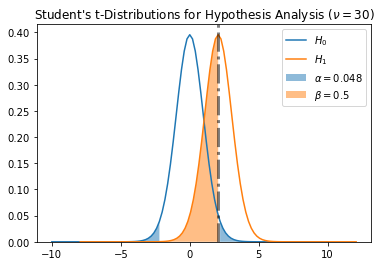

In [39]:
alpha = 0.048

x = np.linspace(-10, 10, 1+100)
df = 30

y0 = st.t(df).pdf(x)
m = -st.t.ppf(alpha/2, df)

plt.plot(x, y0, label='$H_0$')
plt.plot(x+m, y0, label='$H_1$')

plt.ylim((0, None))

plt.fill_between(x, 0, y0, abs(x)>=m, alpha=0.5, label=rf'$\alpha = {alpha}$')
plt.fill_between(x+m, 0, y0, x<=0, alpha=0.5, label=r'$\beta = 0.5$')
plt.axvline(m, c='k', ls='-.', lw=3, alpha=0.5)

plt.title(rf"Student's t-Distributions for Hypothesis Analysis ($\nu = {df}$)")
plt.legend();

# Assignment 2

## 1.

In [40]:
data = pd.read_csv('data2/2/Table1.csv')

In [41]:
data.head()

,y,cov,group
0,38.584295,10.412885,1
1,44.187336,11.002084,1
2,52.094189,6.414673,1
3,59.555212,14.345982,1
4,54.836810,9.047109,1


`a.`

In [42]:
X = np.c_[-data['group'] + 2, np.ones(data.shape[0])]
y = data['y'].to_numpy()

In [43]:
# Alternative Hypothesis - H_1
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
e_hat = y - y_hat
sse = e_hat @ e_hat

In [78]:
pprint(ltxt=f"\\beta = {np.array2string(beta_hat, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {sse:.5f}")

In [79]:
# Null Hypothesis - H_0
X_0 = np.ones(data.shape[0])[:, None]
beta_hat_0 = np.linalg.inv(X_0.T @ X_0) @ X_0.T @ y
y_hat_0 = X_0 @ beta_hat_0
e_hat_0 = y - y_hat_0
sse_0 = e_hat_0 @ e_hat_0

In [80]:
pprint(ltxt=f"SSE_{{H_0}} = {sse_0:.5f}")

In [73]:
# Significance Test
pprint(ltxt=f"F = {(f := ((n:=len(y)) - (p:=2))/(r:=1) * (sse_0 - sse)/sse):.5f}")
pprint(ltxt=f"p = {(pval := 1 - st.f.cdf(f, dfn=r, dfd=n-p)):.5f}")

`b.`

In [93]:
model = sm.OLS(y, X)
results = model.fit()

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     7.427
Date:                Thu, 15 Sep 2022   Prob (F-statistic):            0.00848
Time:                        17:07:12   Log-Likelihood:                -223.53
No. Observations:                  60   AIC:                             451.1
Df Residuals:                      58   BIC:                             455.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.1854      2.637      2.725      0.008       1.908      12.463
const         42.3203      1.864     22.700      0.000      38.588      46.052
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.954
Skew:                           0.007   Prob(JB):                        0.621
Kurtosis:                       2.382   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
pprint(ltxt=f"\\beta = {np.array2string(results.params, precision=5, separator=',')}")
pprint(ltxt=f"SSE = {results.pearson_chi2:.5f}")

In [101]:
pprint(ltxt=f"\\text{{Degrees of Freedom}} = {int(results.df_model)}, {int(results.df_resid)}")

In [98]:
# Significance Test
pprint(ltxt=f"F = {results.fvalue:.5f}")
pprint(ltxt=f"p = {results.f_pvalue:.5f}")

In [111]:
# Other Effect Sizes
pprint(ltxt=f"R^2 = {results.rsquared:.5f}")
pprint(ltxt=f"R^2_{{adj}} = {results.rsquared_adj:.5f}")
# pprint(ltxt=f"Cohen's\ d = {results.tvalues/np.sqrt(len(X)):.5f}")

<div class="alert alert-block alert-success">
There is a significant effect of the drug ($p=0.00848, F=7.42712$).
</div>

`c.`